In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandasql as ps

In [3]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [4]:
sns.set_style = 'seaborn-whitegrid'

sns.set(rc={"font.style":"normal",
            "axes.facecolor":"white",
            'grid.color': '.8',
            'grid.linestyle': '-',
            "figure.facecolor":"white",
            "figure.titlesize":20,
            "text.color":"black",
            "xtick.color":"black",
            "ytick.color":"black",
            "axes.labelcolor":"black",
            "axes.grid":True,
            'axes.labelsize':10,
            'xtick.labelsize':10,
            'font.size':10,
            'ytick.labelsize':10})

In [5]:
path = '../data/womens_clothing_ecommerce_reviews_transformed.csv'

df = pd.read_csv(path)
df.head()

,sentiment,review_body,product_category
0,1,If this product was in petite i would get the...,Blouses
1,1,Love this dress! it's sooo pretty. i happene...,Dresses
2,0,I had such high hopes for this dress and reall...,Dresses
3,1,I love love love this jumpsuit. it's fun fl...,Pants
4,1,This shirt is very flattering to all due to th...,Blouses


# 1. Analyse the dataset by `product_category` and `sentiment`

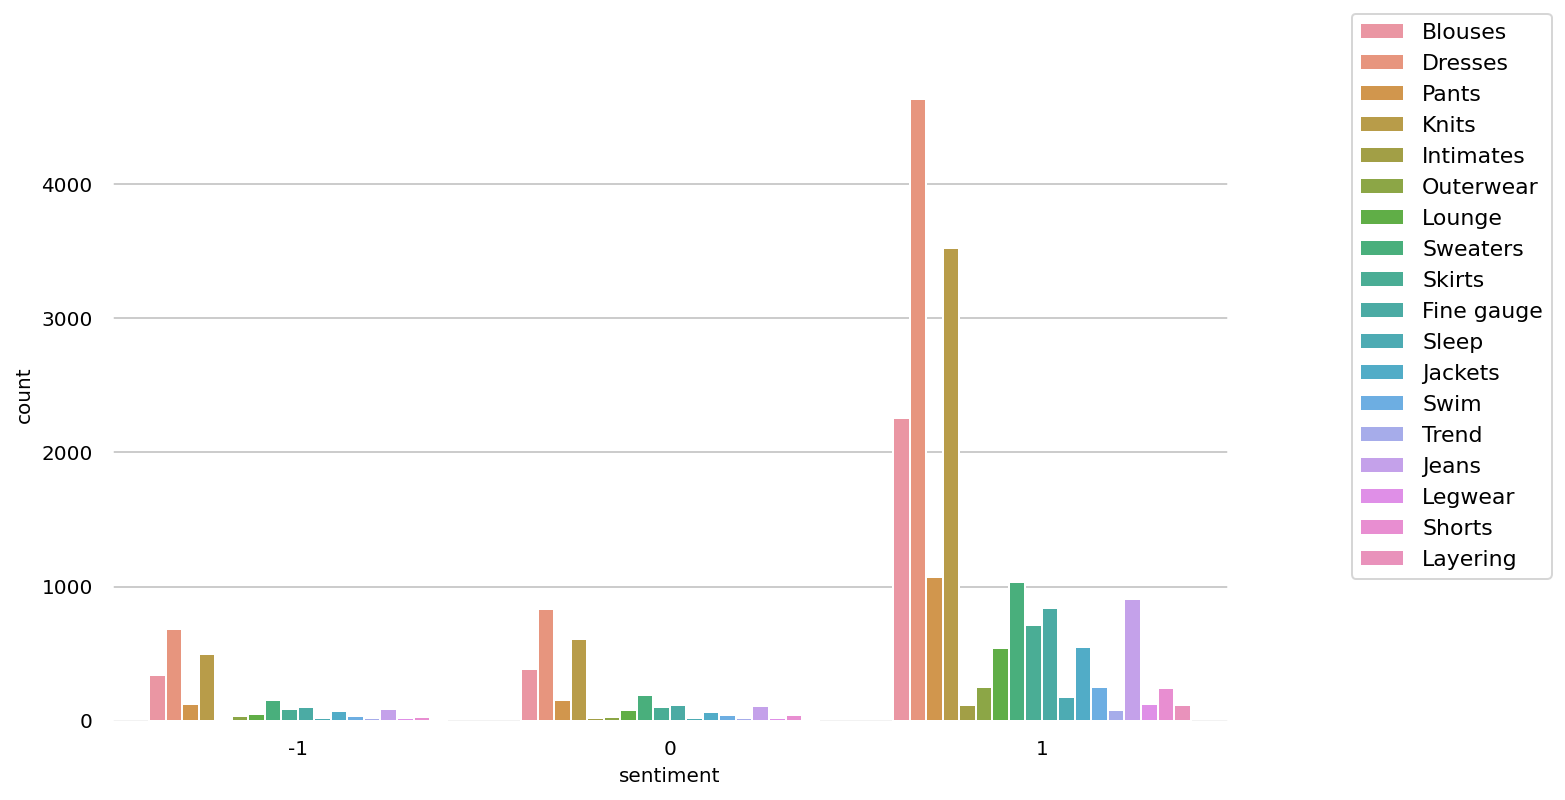

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='sentiment', hue='product_category')
plt.legend(loc='upper right',bbox_to_anchor=(1.3, 1.1))

# 2. Balance the dataset by `product_category` and `sentiment`

In [7]:
df_grouped_by = df.groupby(['product_category', 'sentiment'])
df_balanced = df_grouped_by.apply(lambda x: x.sample(df_grouped_by.size().min()).reset_index(drop=True))

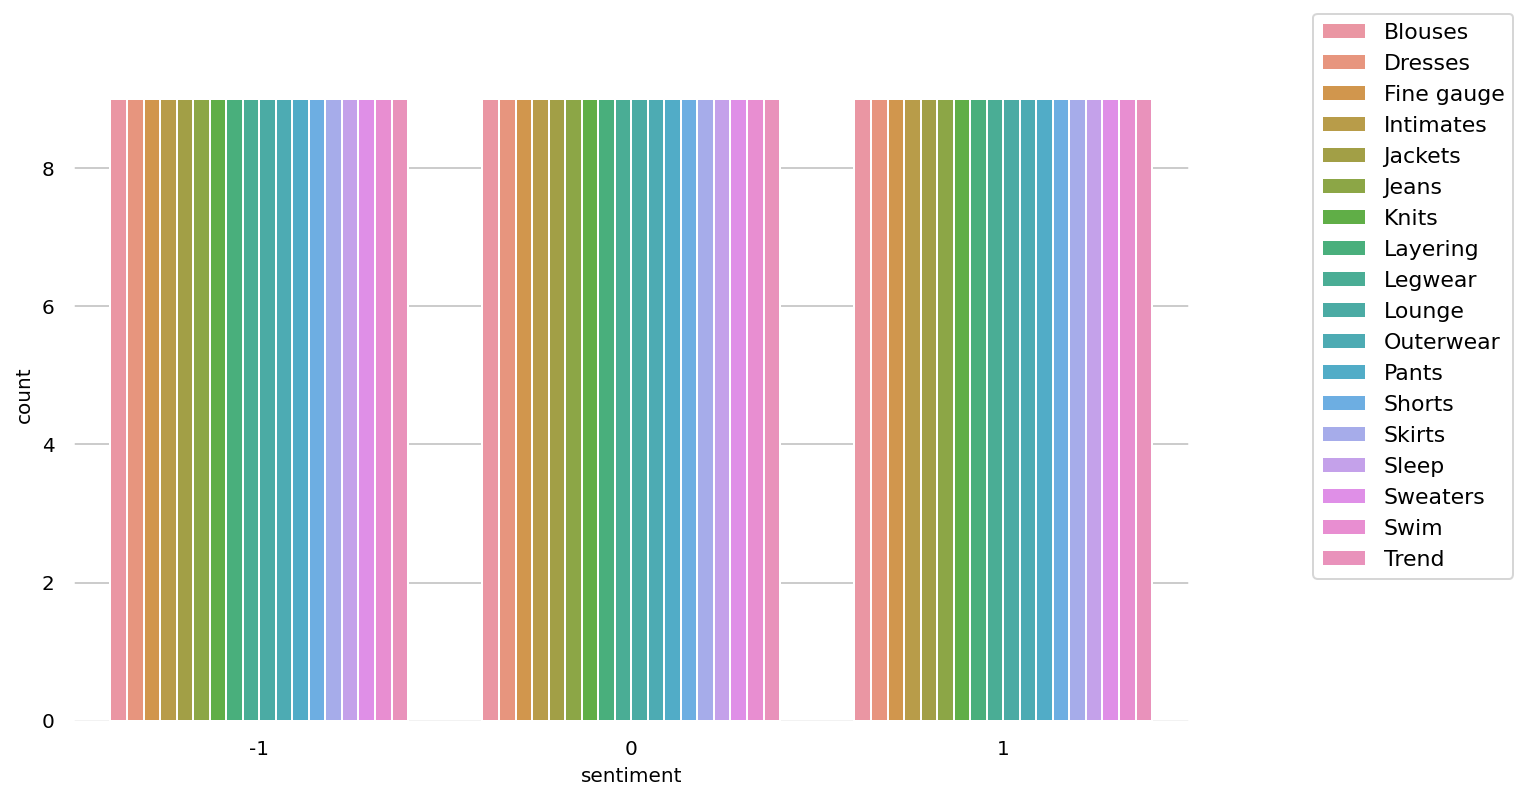

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_balanced, x='sentiment', hue='product_category')
plt.legend(loc='upper right',bbox_to_anchor=(1.3, 1.1))

In [9]:
path_balanced = '../data/womens_clothing_ecommerce_reviews_balanced.csv'
df_balanced.to_csv(path_balanced, index=False, header=True)